# Assignment #3

# 1. ArcAscii to NetCDF4 (50 points)

The directory `/shared_space/data/MSWEP/AAIGrid` contains spatial grids of the [MSWEP](http://www.gloh2o.org/) dataset at a 1 month temporal resolution and 1 arcdegree spatial resolution for 2015 in the AAIGrid format. Create a single NetCDF4 file with one 3D array (time,lat,lon) that contains this data. Ensure that the created NetCDF4 is CF-compliant by following the guidelines described [here](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#_netcdf_files_and_components). You can also use the ERA-Interim NetCDF4 file as an example (/shared_space/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc). Note that you will have to write your own function to parse the ArcAscii (i.e., AAIGRID) files; you may not use rasterio for this problem.

# 2. Showing elevation at multiple zoom levels (50 points)

Using the file `/shared_space/data/NED/dem_lat3536_lon-80-79.tif`, reverse engineer the code that created the following figure (Hint: You will want to use matplotlib.patches).

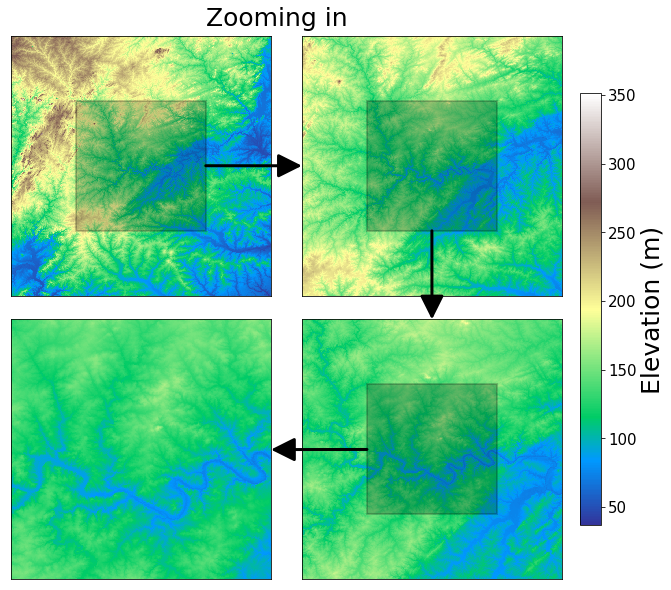

# 3. Optional bonus problem: Movie of the time evolution of global annual precipitation (25 points)

Using the file /shared_space/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc:

* Upscale the montly precipitation to an annual time step.
* Use the assembled annual precipitation dataset to create a movie of the time evolution of global precipitation between 1979 and 2015.

The following example will show you how to make a movie in a Jupyter Notebook: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/. [Hint: You will need to use ax.imshow() instead of ax.line()]. 
